# Analyse synthesis

Edited by Louise 23/02/2023

Plot the outputs of a synthesis in order to control the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import foscat.scat_cov as sc

2023-02-22 19:11:42.061876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 19:11:42.226035: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-22 19:11:42.226062: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-22 19:11:43.072294: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Get outputs

In [16]:
output_dir = '../scripts/outputs/'

# Maps
tmap = np.load(output_dir + 'target_map.npy')
imap = np.load(output_dir + 'initial_map.npy')
omap = np.load(output_dir + 'output_map.npy')

nside = hp.get_nside(tmap)
print(f'{nside = }')

# Coeffs
icoeff = sc.read(output_dir + 'initial_coeff')
tcoeff = sc.read(output_dir + 'target_coeff')
ocoeff = sc.read(output_dir + 'output_coeff')

# Loss
loss = np.load(output_dir + 'loss.npy')
print(loss.shape)

# Plot the maps

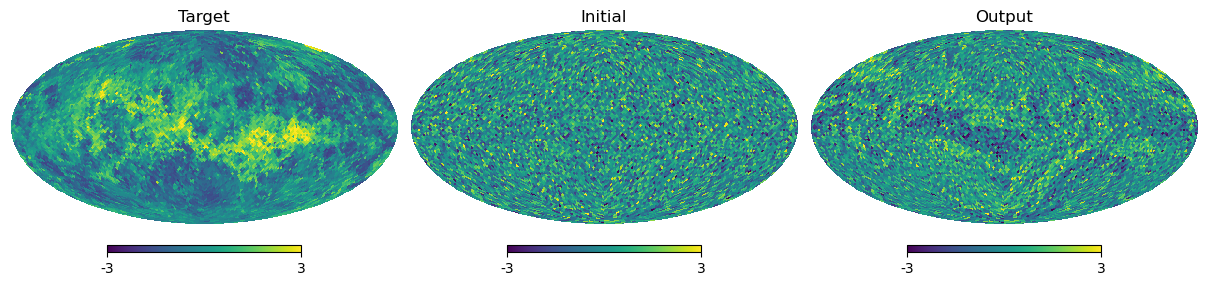

In [18]:
plt.figure(figsize=(12, 4))
hp.mollview(tmap, cmap='viridis', hold=False, sub=(1, 3, 1), nest=True, title='Target', min=-3, max=3)
hp.mollview(imap, cmap='viridis', hold=False, sub=(1, 3, 2), nest=True, title='Initial', min=-3, max=3)
hp.mollview(omap, cmap='viridis', hold=False, sub=(1, 3, 3), nest=True, title='Output', min=-3, max=3)

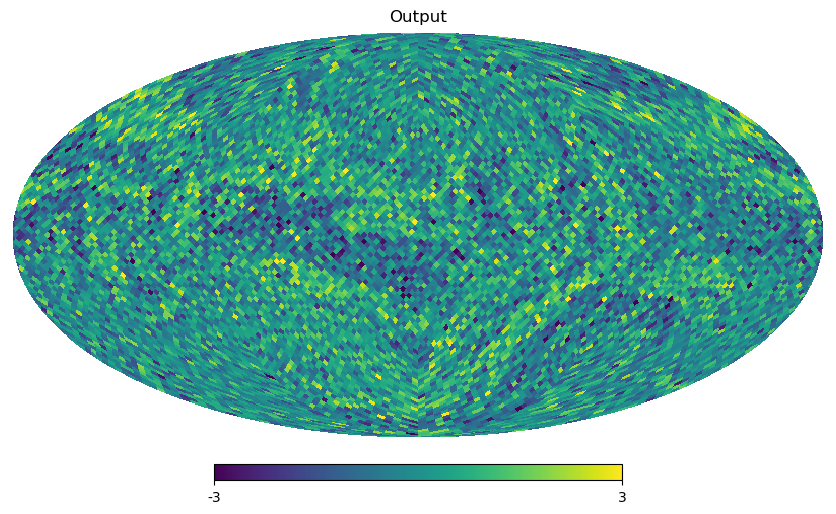

In [23]:
hp.mollview(omap, cmap='viridis', nest=True, title='Output', min=-3, max=3)

# Plot the coefficients

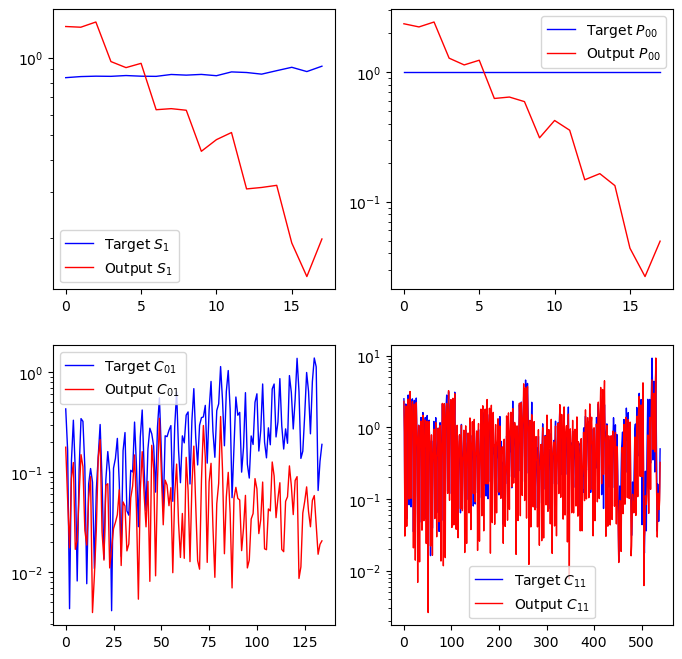

In [19]:
tcoeff.plot(color='b', name='Target')
# icoeff.plot(hold=False, color='g', name='Initial')
ocoeff.plot(hold=False, color='r', name='Output')

# Plot the angular power spectrum

Text(0, 0.5, '$C_\\ell$')

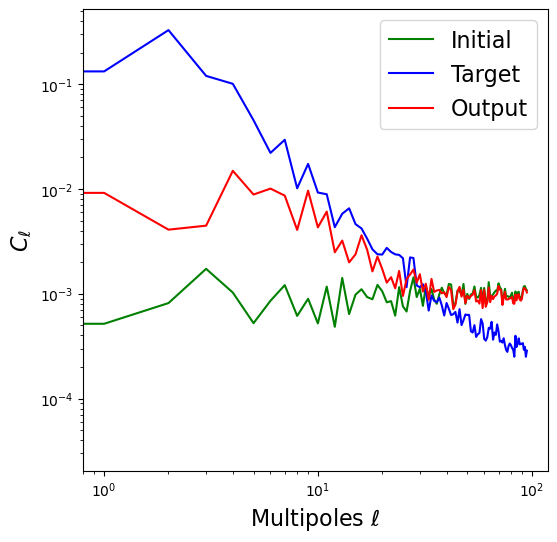

In [20]:
idx = hp.ring2nest(nside, np.arange(12*nside**2))

cli = hp.anafast((imap - np.median(imap))[idx])
clt = hp.anafast((tmap - np.median(tmap))[idx])
clo = hp.anafast((omap - np.median(omap))[idx])

plt.figure(figsize=(6,6))
plt.plot(cli,color='green',label=r'Initial')
plt.plot(clt,color='blue',label=r'Target')
plt.plot(clo,color='red',label=r'Output')
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel(r'Multipoles $\ell$', fontsize=16)
plt.ylabel(r'$C_\ell$', fontsize=16)

# Plot the loss

(20,)


Text(0.5, 0, 'Number of iterations')

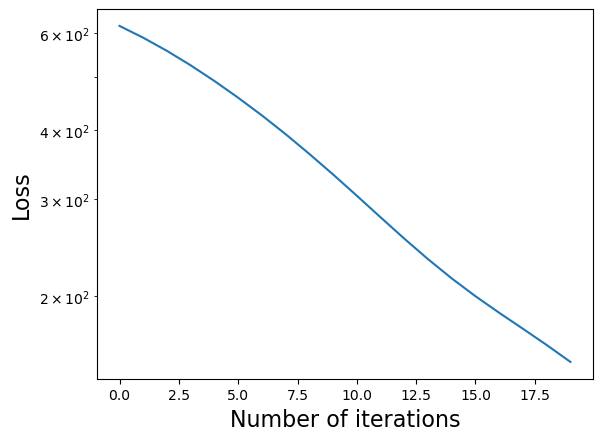

In [22]:
# Plot the loss
plt.figure()
plt.plot(loss[:])
plt.yscale('log')
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Number of iterations', fontsize=16)